## Practice 1

In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported')

Libraries imported


In [2]:
np.random.seed(0)

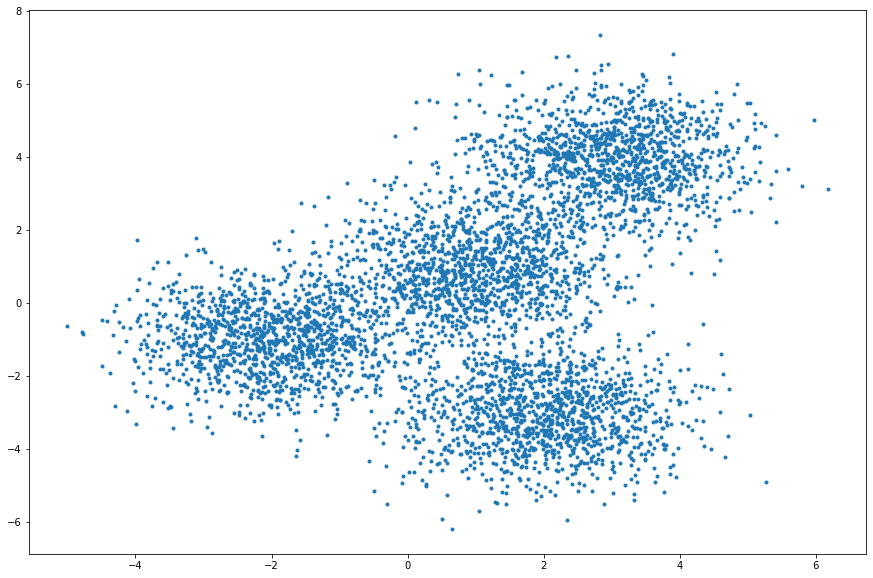

In [6]:
X, y = make_blobs(n_samples=5000, centers=[[3, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=1.0)

plt.figure(figsize = (15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [10]:
kmeans = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [12]:
kmeans_centers = kmeans.cluster_centers_
kmeans_centers

array([[ 3.01220148,  3.96512896],
       [ 2.0164381 , -3.0915782 ],
       [-2.02552849, -1.00948451],
       [ 0.98852836,  0.92177368]])

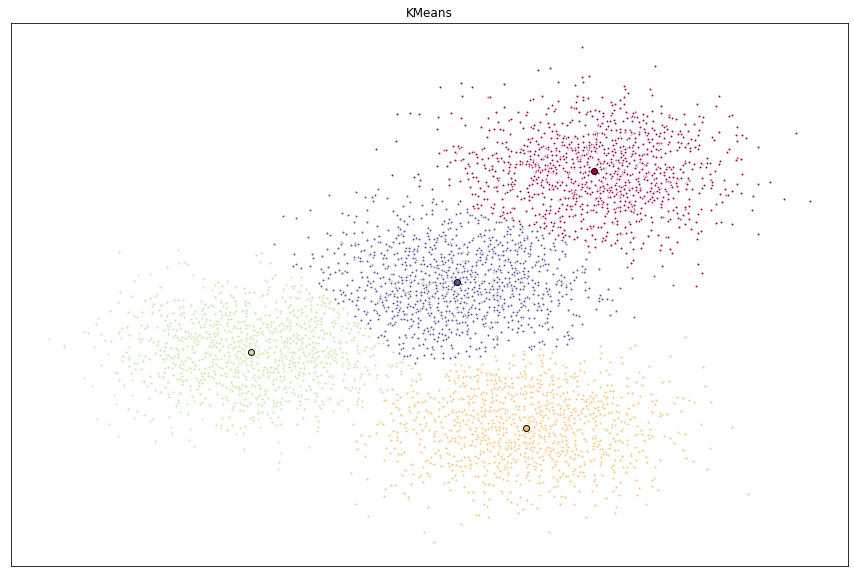

In [18]:
fig = plt.figure(figsize = (15,10))
colors = plt.cm.Spectral(np.linspace(0,1,len(set(kmeans_labels))))
ax=fig.add_subplot(1,1,1)
                         
for k, col in zip(range(len([[3,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (kmeans_labels == k)
    cluster_center = kmeans_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor = col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor='k', markersize = 6)
                        
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
                         

## Practice2

In [19]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [20]:
df_customers = pd.read_csv('customer_segmentation.csv')
df_customers.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [21]:
df_customers = df_customers.drop('Address', axis = 1)
df_customers.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [22]:
from sklearn.preprocessing import StandardScaler

X = df_customers.values[:, 1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [23]:
num_clusters = 3

kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters, n_init = 12)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_


In [26]:
df_customers['labels'] = kmeans_labels
df_customers.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
